# Solution: effect of clouds on the planetary energy balance

In this exercise you are going to compute the effect of clouds on the planetary energy balance, with the help of a simple 1-column model of the atmosphere.

In [1]:
# These are the modules we need
import numpy as np
import matplotlib.pyplot as plt

We define some constants:

In [7]:
s_0 = 1367  # Solar constant (W m-2)
sigma = 5.670e-8  # Stefan–Boltzmann constant
t_s = 288  # Average temperature of the Earth's surface (K)
t_clr = 261  # Radiation temperature of a clear sky atmosphere (K)
gamma = -6.5  # Lapse-rate in the atmoshpere (K km-1)
surface_albedo = 0.12  # Albedo of the surface of the Earth

## Effect of low clouds on the EB 

To isolate the effect of clouds, we assume a very simple representation of the atmosphere as a simple column, free of other clouds. The temperature of the cloud would then be: 

$T_{Cloud} = T_{Surface} + \gamma \, z $, 

with $z$ the cloud altitude (km) and $\gamma$ the lapse-rate.

**Q: compute the temperature (K) of a cloud at z = 5km, assuming a constant lapse rate and an average surface temperature of 288K:**

In [36]:
t_c = t_s + 5 * gamma
f'T_C = {t_c} K'

'T_C = 255.5 K'

Now assume that the cloud absorbs all the IR radiation emited by the surface (a reasonable approximation), while emmitting IR directly back to space according to its own temperature. So the total energy change of the climate system in the longwave (LW) spectrum would be:

$\Delta E_{LW} = LW_{ClrSky}\uparrow - LW_{Cloud}\uparrow$

So, according to Stefan-Boltzmann:

$\Delta E_{LW} = \sigma T_{ClrSky}^4 - \sigma T_{Cloud}^4$

Where $T_{ClrSky}$ is the radiation temperature of a clear sky atmosphere (here assumed to be 261 K).

**Q: compute the approximate "average" altitude at which the clear sky atmosphere emits at 261 K (from the standard lapse rate). This will give the approximate minimum altitude at which the equation above is valid.**

In [37]:
f'Limit of validity : {(t_clr - t_s) / gamma:.2f} km'

'Limit of validity : 4.15 km'

**Q: compute the effect of a low cloud on the LW energy balance of the climate system. Is the cloud a LW energy loss or an energy gain for the system?**

In [38]:
e_lw = sigma * t_clr**4 - sigma * t_c**4
f'Delta E_LW = {e_lw:.1f} W m^-2'

'Delta E_LW = 21.5 W m^-2'

Now consider the shortwave effects of the cloud if it has an albedo of 0.5. The net difference for the climate system is simply the increased loss in solar energy because of an increased reflection:

$\Delta E_{SW} = - S_0 / 4 \cdot (\alpha _{Cloud} - \alpha _{Earth} ) $

**Q: compute the effect of a low cloud on the shortwave (SW) energy balance of the climate system. Is the cloud a SW energy loss or an energy gain for the system?**

In [39]:
e_sw = - s_0 / 4 * (0.5 - surface_albedo)
'Delta E_SW = {0:.1f} W m^-2'.format(e_sw)

'Delta E_SW = -129.9 W m^-2'

Finally, the net energy difference for the climate system is:
    
$\Delta E_{TOT} = \Delta E_{SW} + \Delta E_{LW}$

**Q: compute the effect of a low cloud on the total (SW + LW) energy balance of the climate system. Is the low cloud a total energy loss or an energy gain for the system?**

In [40]:
e_tot = e_sw + e_lw
'Delta E_TOT = {0:.1f} W m^-2'.format(e_tot)

'Delta E_TOT = -108.4 W m^-2'

<span style="color:red"> $\rightarrow$ **Low-level** clouds are **cooling** the climate system</span>

## Effect of high clouds on the EB 

**Q: repeat the calculations above to compute the effect of a high cloud (z = 12km, albedo unchanged) on the total energy balance of the climate system. Is the high cloud a total energy loss or an energy gain for the system?**

In [41]:
t_c = t_s + 12 * gamma
print('T_C = {} K'.format(t_c))
e_lw = sigma * t_clr**4 - sigma * t_c**4
print('Delta E_LW = {0:.1f} W m^-2'.format(e_lw))
e_sw = - s_0 / 4 * (0.5 - surface_albedo)
print('Delta E_SW = {0:.1f} W m^-2'.format(e_sw))
e_tot = e_sw + e_lw
print('Delta E_TOT = {0:.1f} W m^-2'.format(e_tot))

T_C = 210.0 K
Delta E_LW = 152.8 W m^-2
Delta E_SW = -129.9 W m^-2
Delta E_TOT = 23.0 W m^-2


<span style="color:red"> $\rightarrow$ **High-level** clouds are **warming** the climate system </span>

## And now automate things a little bit

**Q: repeat the calculations above for the whole range of altitudes between 4 and 12 km (see the previous lesson for how to do this). Plot the curve.**

In [42]:
def cloud_effect(z, albedo=0.5):
    """Compute the effect of clouds as a function of the altitude z and the cloud albedo (default 0.5)"""
    t_c = t_s + z * gamma
    e_lw = sigma * t_clr**4 - sigma * t_c**4
    e_sw = - s_0 / 4 * (albedo - surface_albedo)
    e_tot = e_sw + e_lw
    return e_tot

**Q: repeat the calculations above, for three values of the cloud albedo: 0.3, 0.5, 0.7. Plot the three curves on the same plot and add a legend to the plots (see the "Getting started" notebook for guidance).**

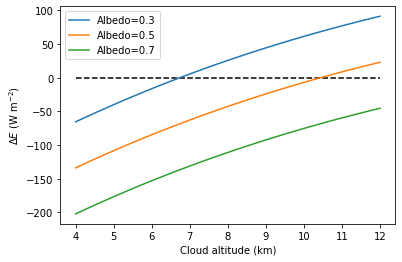

In [43]:
z = np.linspace(4, 12, 100)  # altitude range
plt.plot(z, z*0, color='k', linestyle='--')
plt.plot(z, cloud_effect(z, albedo=0.3), label='Albedo=0.3')
plt.plot(z, cloud_effect(z, albedo=0.5), label='Albedo=0.5')
plt.plot(z, cloud_effect(z, albedo=0.7), label='Albedo=0.7')
plt.xlabel('Cloud altitude (km)')
plt.ylabel('$\Delta E$ (W m$^{-2}$)')
plt.legend(loc='best');

**Q: discuss the features of the plot, and the conditions necessary for a cloud to be an energy gain or an energy loss for the climate system. Now search for typical values of cloud albedos depending on their type, and come back to your plot for comparison.**

If you complicate things a bit by noticing that high clouds have a low albedo and low clouds a high albedo while thick clouds have a high albedo but also a high cloud top you can imagine that the system becomes extremely sensitive.

**The processes governing cloud albedo are extremely complex. The uncertainty about changes in the clouds frequency, altitude, and albedo are one of the highest uncertainty in the climate models.**

More info on [Skeptikal Science's page on the topic](http://www.skepticalscience.com/clouds-negative-feedback-basic.htm) (basic and intermediate)